In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Feed-Forward Neural Network

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [12]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [13]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


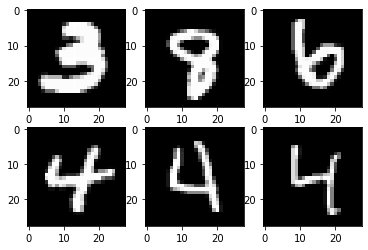

In [15]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [18]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [19]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [21]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}')

epoch 1 / 2, step 100/600, loss=0.3080
epoch 1 / 2, step 200/600, loss=0.2555
epoch 1 / 2, step 300/600, loss=0.2508
epoch 1 / 2, step 400/600, loss=0.1505
epoch 1 / 2, step 500/600, loss=0.2567
epoch 1 / 2, step 600/600, loss=0.3619
epoch 2 / 2, step 100/600, loss=0.2846
epoch 2 / 2, step 200/600, loss=0.2320
epoch 2 / 2, step 300/600, loss=0.3013
epoch 2 / 2, step 400/600, loss=0.1259
epoch 2 / 2, step 500/600, loss=0.0973
epoch 2 / 2, step 600/600, loss=0.2736


In [24]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.62


# Convolutional Neural Networks

In [26]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
# hyper parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [28]:
# dataset has PILImage images of range [0, 1]
# we transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [32]:
train_dataset = torchvision.datasets.CIFAR10(root='.', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='.', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

In [90]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [91]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [92]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

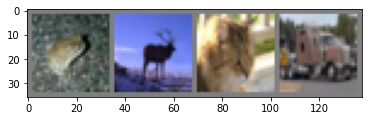

In [93]:
# show images
imshow(torchvision.utils.make_grid(images))

In [94]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [95]:
model = ConvNet().to(device)

In [96]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [97]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1} / {num_epochs}], Step [{i+1} / {n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1 / 4], Step [2000 / 12500], Loss: 2.3431
Epoch [1 / 4], Step [4000 / 12500], Loss: 2.3037
Epoch [1 / 4], Step [6000 / 12500], Loss: 2.3015
Epoch [1 / 4], Step [8000 / 12500], Loss: 2.2871
Epoch [1 / 4], Step [10000 / 12500], Loss: 2.3179
Epoch [1 / 4], Step [12000 / 12500], Loss: 1.9848
Epoch [2 / 4], Step [2000 / 12500], Loss: 2.0163
Epoch [2 / 4], Step [4000 / 12500], Loss: 1.9955
Epoch [2 / 4], Step [6000 / 12500], Loss: 2.1047
Epoch [2 / 4], Step [8000 / 12500], Loss: 1.8355
Epoch [2 / 4], Step [10000 / 12500], Loss: 1.9637
Epoch [2 / 4], Step [12000 / 12500], Loss: 2.6703
Epoch [3 / 4], Step [2000 / 12500], Loss: 1.7882
Epoch [3 / 4], Step [4000 / 12500], Loss: 2.0115
Epoch [3 / 4], Step [6000 / 12500], Loss: 1.6207
Epoch [3 / 4], Step [8000 / 12500], Loss: 1.5435
Epoch [3 / 4], Step [10000 / 12500], Loss: 1.5357
Epoch [3 / 4], Step [12000 / 12500], Loss: 1.4685
Epoch [4 / 4], Step [2000 / 12500], Loss: 1.4367
Epoch [4 / 4], Step [4000 / 12500], Loss: 1.1490
Epoch [4 / 4],

In [100]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (values, index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 45.77 %
